# Naïve Bayes

Naïve Bayes is a family of probabilistic machine learning algorithms based on applying Bayes' theorem with the "naïve" assumption of conditional independence between every pair of features given the value of the class variable.

## Key Concepts

### Bayes' Theorem
Bayes' theorem describes the probability of an event based on prior knowledge of conditions that might be related to the event. In the context of Naïve Bayes, it's used to calculate the probability of a class given a set of features.

### Conditional Independence
The "naïve" assumption in Naïve Bayes is that all features are conditionally independent given the class. This means that the presence of a particular feature does not affect the presence of any other feature, given the class variable. This simplifies the computation, and while this assumption is rarely true in real-world data, Naïve Bayes classifiers often perform surprisingly well.

## Types of Naïve Bayes

There are several types of Naïve Bayes classifiers, each suited to a different type of data:

- **Gaussian Naïve Bayes**: Assumes that continuous features follow a normal distribution. This is the most commonly used type.

- **Multinomial Naïve Bayes**: Used for discrete counts. For example, in text classification, we might count the number of times each word appears in a document.

- **Bernoulli Naïve Bayes**: Useful if your feature vectors are binary (i.e., zeros and ones).

## Advantages of Naïve Bayes

- It's simple and easy to understand.
- It's fast, which makes it useful for high-dimensional datasets.
- Despite its simplicity, it can be surprisingly accurate and is particularly good for text classification tasks.
- It performs well even with irrelevant features and is relatively unaffected by them due to the independence assumption.

## Limitations of Naïve Bayes

- It makes a strong assumption about the independence of the features. Real-world data is usually more complex, and this assumption is rarely true, which can limit its performance.
- It has difficulty with zero-frequency values. If a given class and feature value never occur together in the training data, the probability estimate will be zero. This problem is known as "zero probability problem" and can be solved using smoothing techniques.
- It's a bad estimator, so the probability outputs from `predict_proba` are not to be taken too seriously.

In conclusion, Naïve Bayes is a powerful algorithm for classification tasks, especially when computational efficiency is important. Despite its simplicity and the naivety of its assumptions, it can provide surprisingly good results, particularly in text classification and other tasks involving large, high-dimensional datasets.

***EXERCISE 1***

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=0)

In [20]:
import pandas as pd
 
df = pd.DataFrame(data.data, columns=data.feature_names)

df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


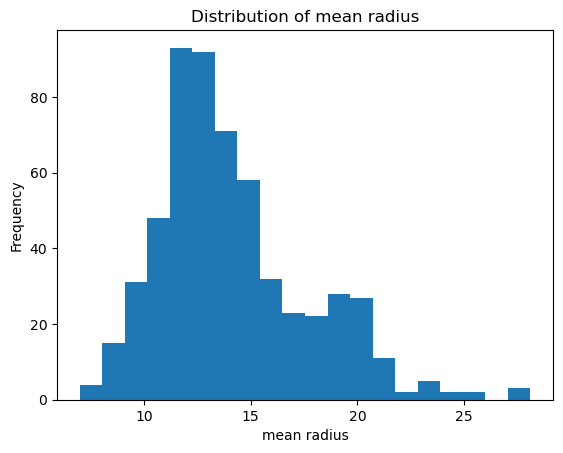

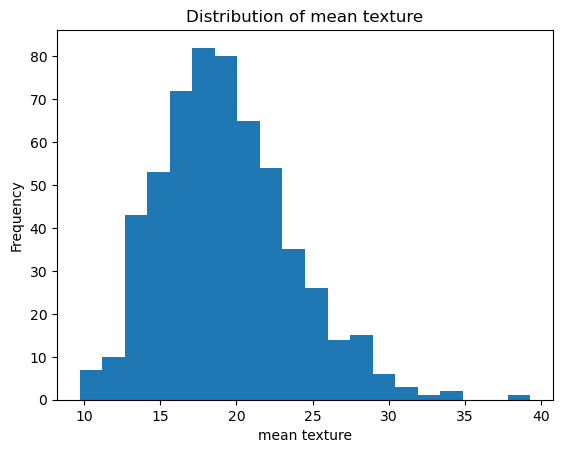

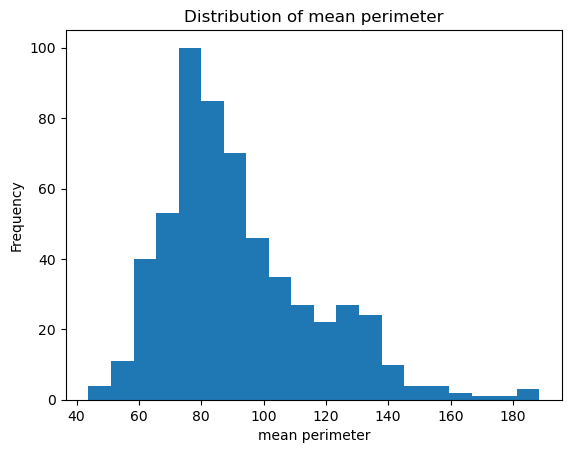

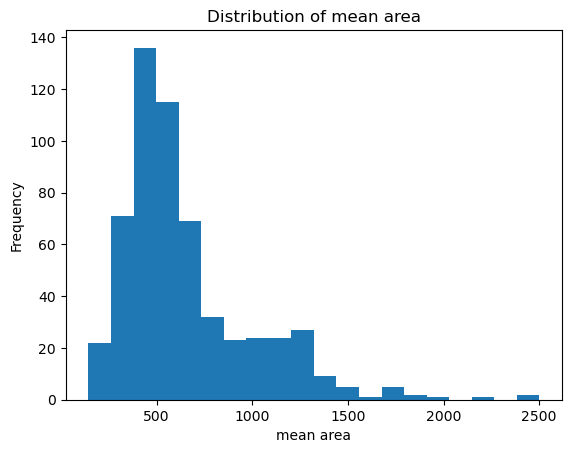

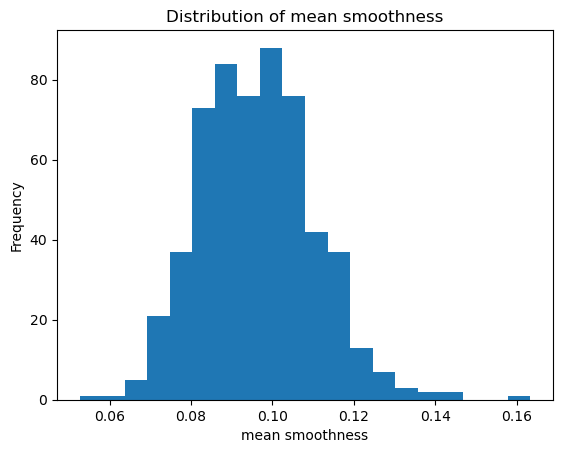

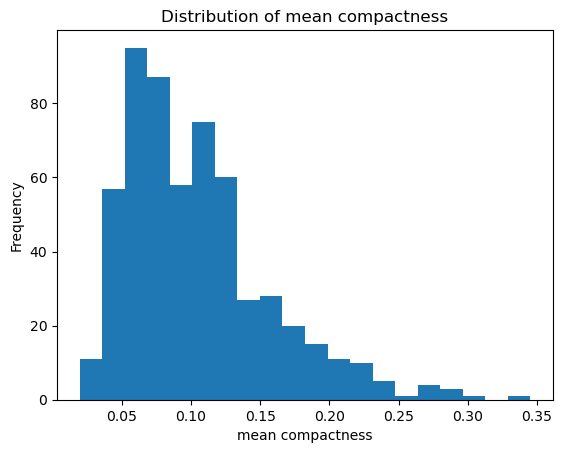

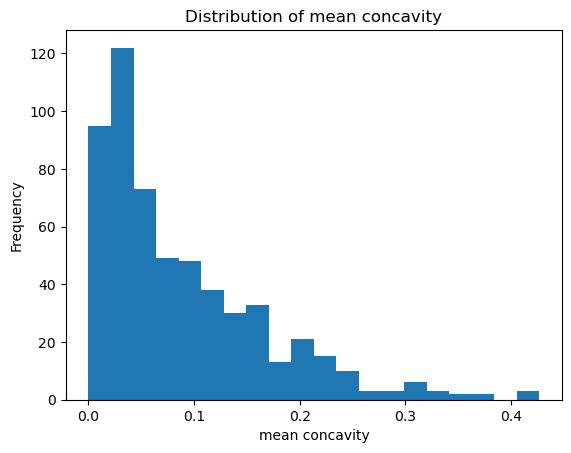

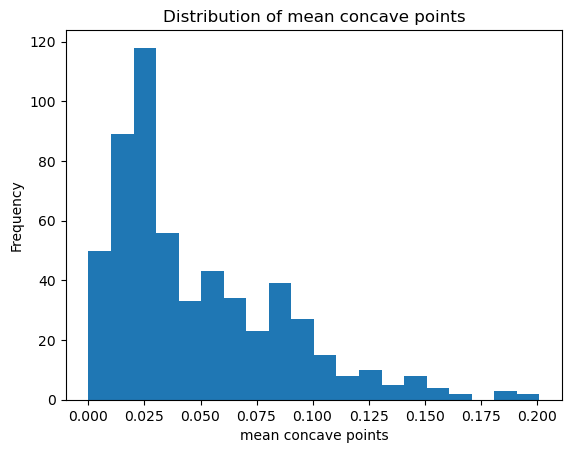

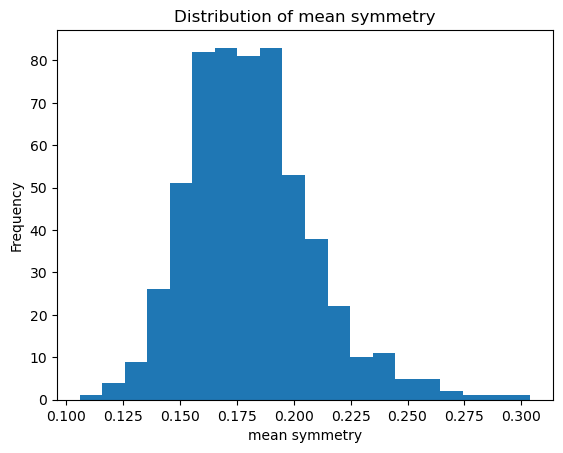

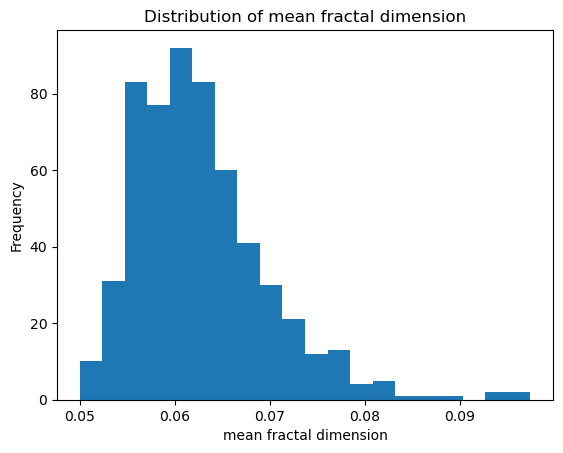

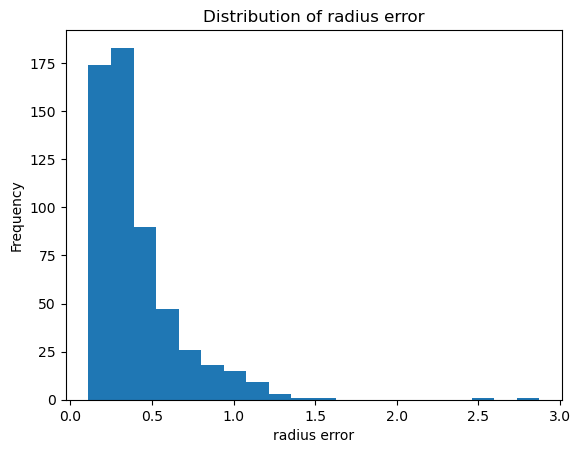

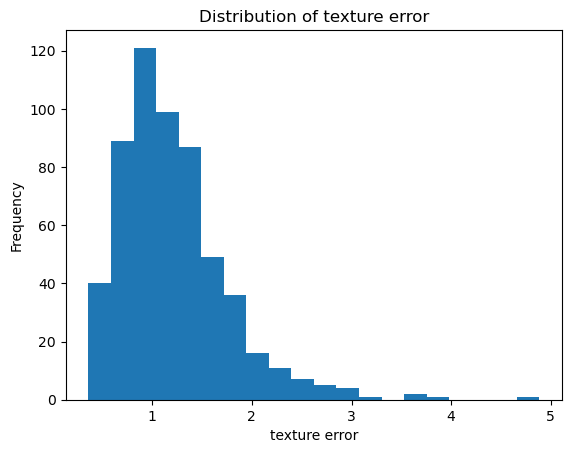

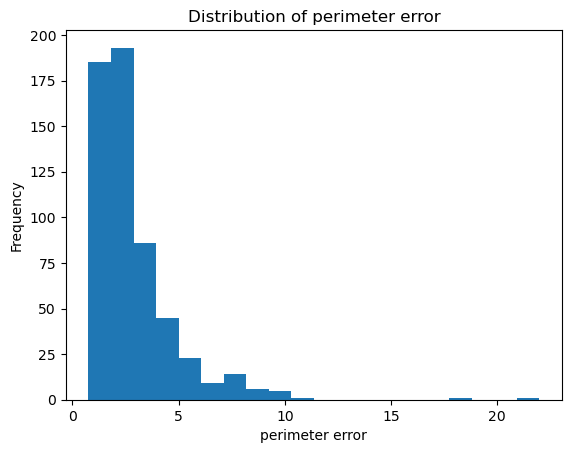

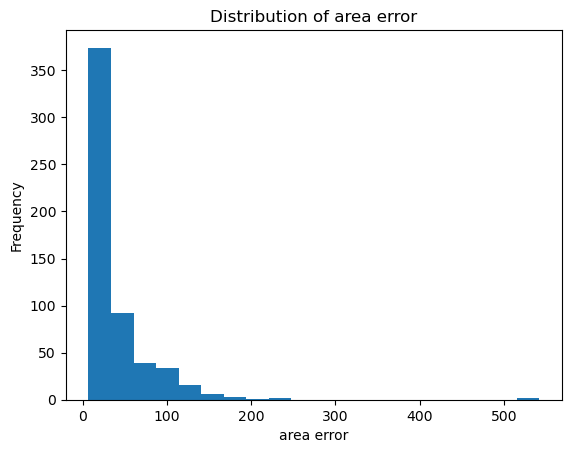

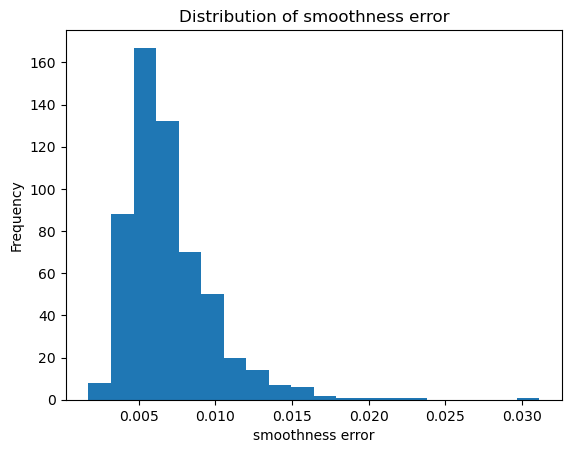

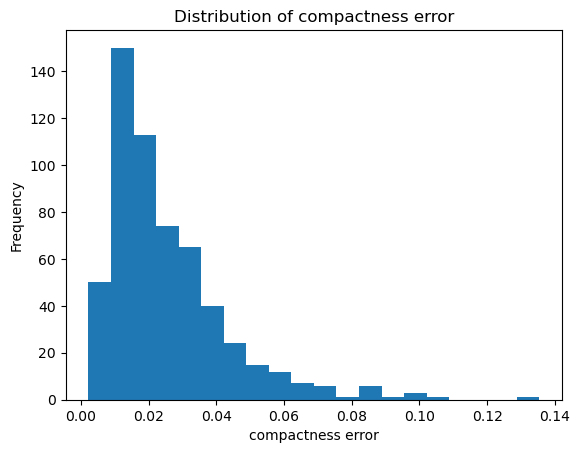

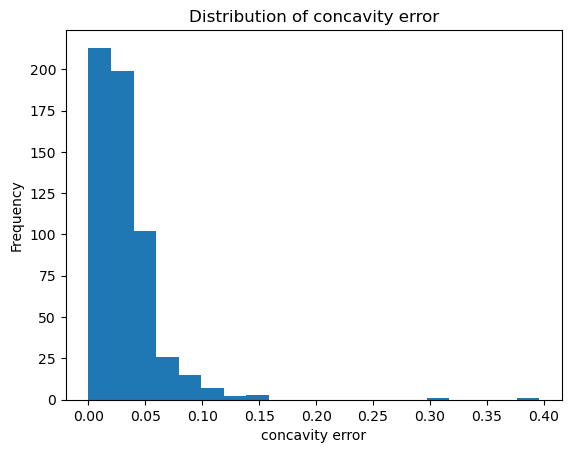

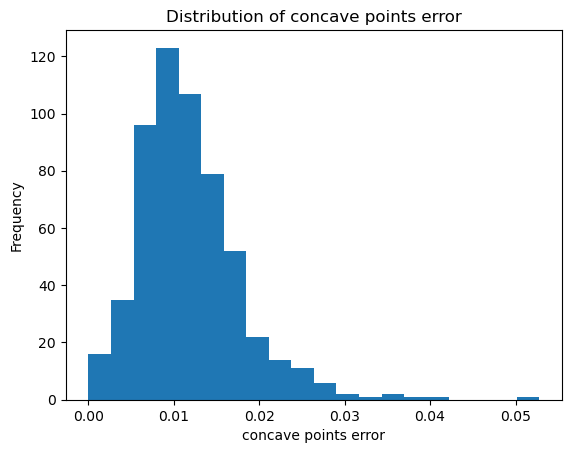

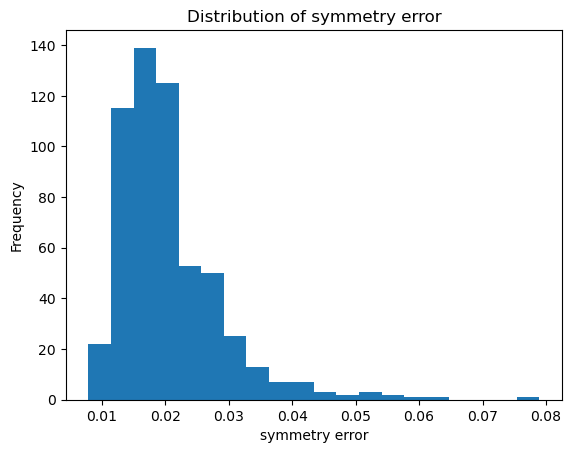

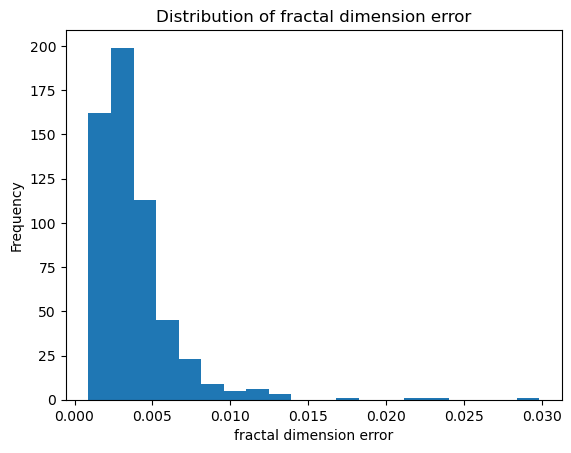

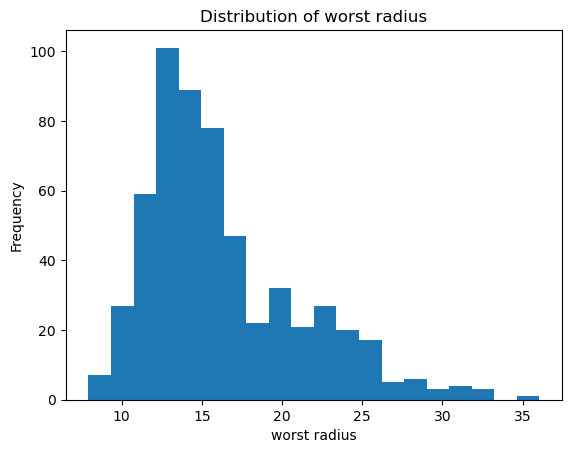

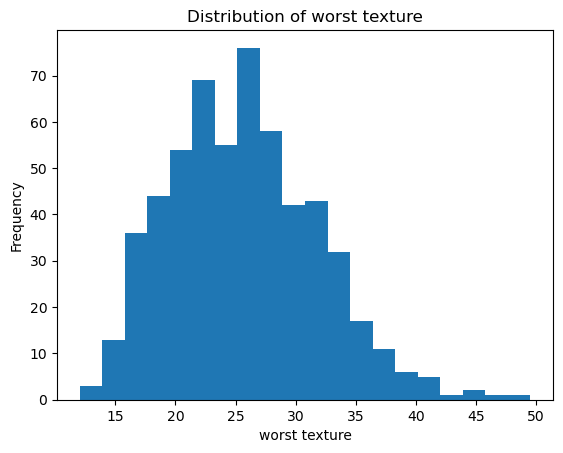

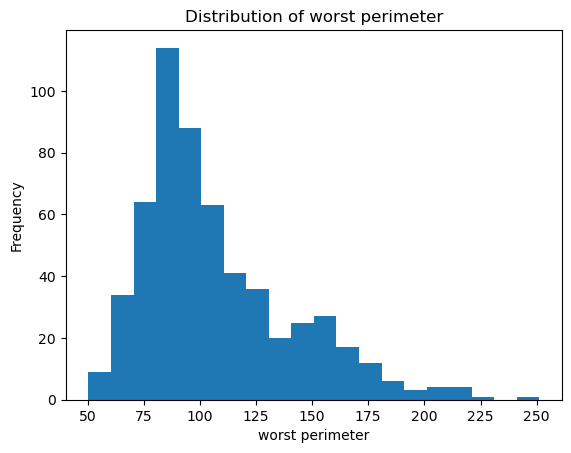

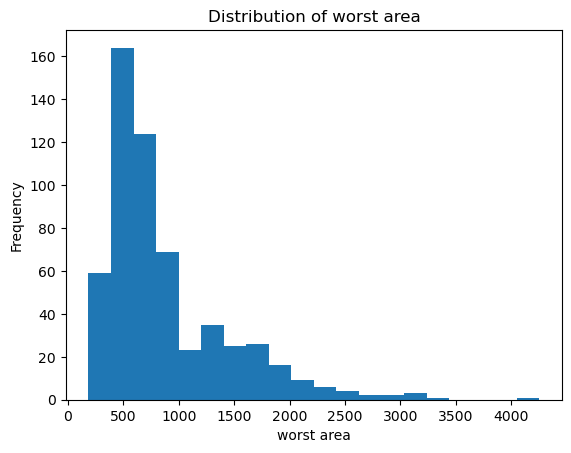

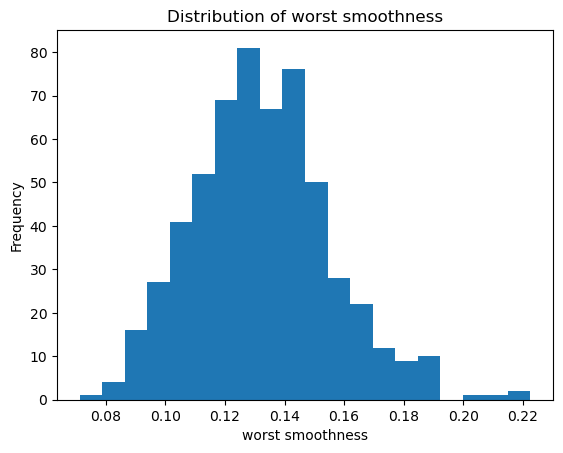

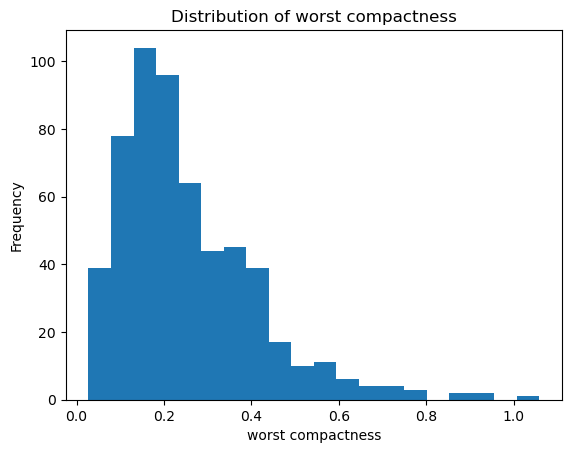

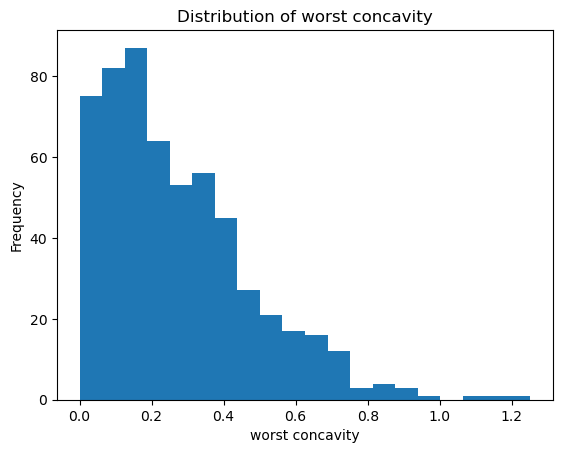

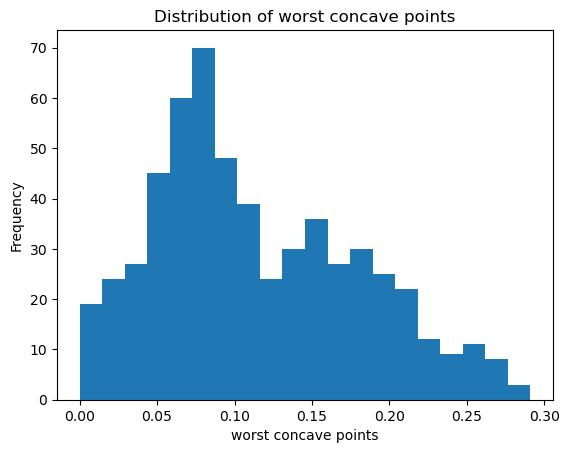

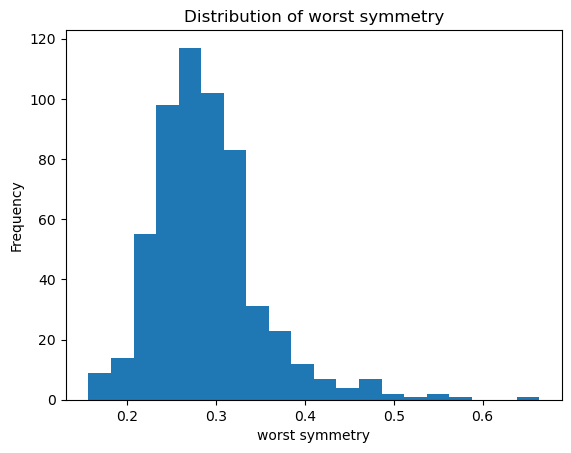

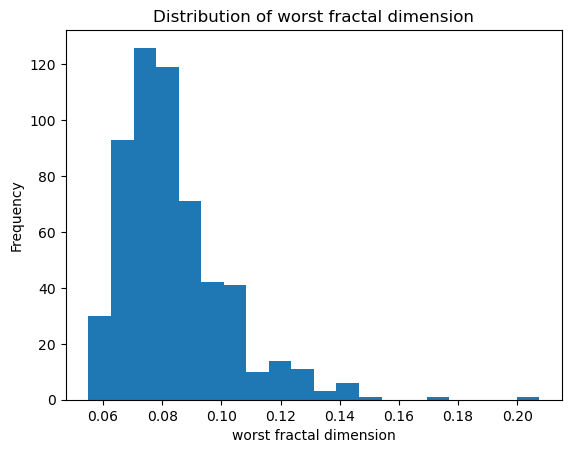

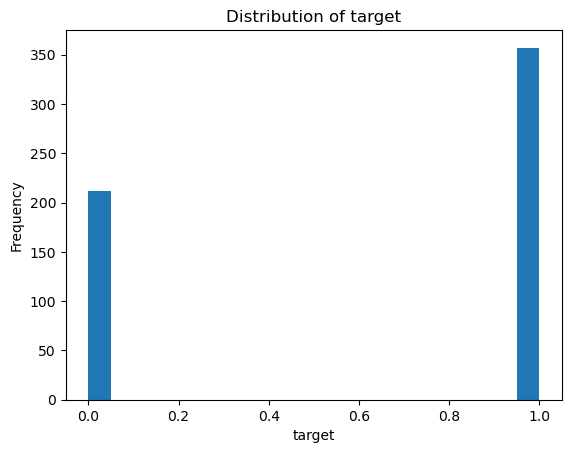

In [23]:
import matplotlib.pyplot as plt

for column in df.columns:
    plt.figure()
    df[column].plot(kind='hist', bins=20)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


In [24]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

classifier.fit(X_train, y_train)

GaussianNB()

In [25]:
train_score = classifier.score(X_train, y_train)
test_score = classifier.score(X_test, y_test)

print("Training Score:", train_score)
print("Testing Score:", test_score)

Training Score: 0.9422110552763819
Testing Score: 0.9239766081871345


In [26]:
probabilities = classifier.predict_proba(X_test[:10])

for i in range(len(probabilities)):
    print(f"Sample {i+1}: Malignant: {probabilities[i][0]}, Benign: {probabilities[i][1]}")

Sample 1: Malignant: 0.9999996229468135, Benign: 3.7705318649843974e-07
Sample 2: Malignant: 4.4824900877405946e-13, Benign: 0.9999999999995524
Sample 3: Malignant: 3.8080276681690467e-14, Benign: 0.9999999999999627
Sample 4: Malignant: 1.920532608164554e-11, Benign: 0.9999999999807949
Sample 5: Malignant: 2.7857811366677806e-16, Benign: 1.0
Sample 6: Malignant: 4.215045911249471e-14, Benign: 0.9999999999999574
Sample 7: Malignant: 9.548318382593365e-11, Benign: 0.9999999999045173
Sample 8: Malignant: 8.42593605811673e-15, Benign: 0.9999999999999911
Sample 9: Malignant: 1.8052099908398488e-13, Benign: 0.9999999999998188
Sample 10: Malignant: 5.70735049540393e-17, Benign: 1.0


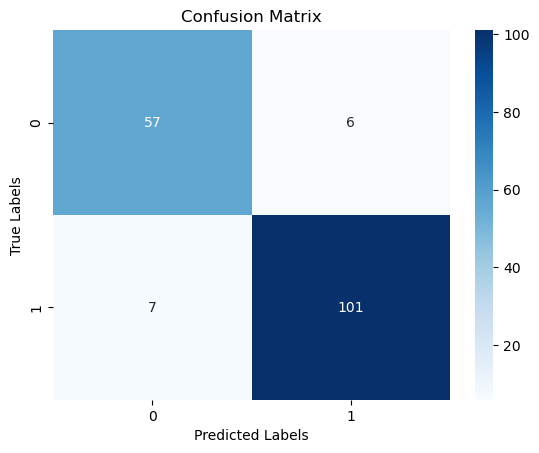

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


***EXERCISE 2***

In [47]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1)

In [30]:
import pandas as pd
 
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


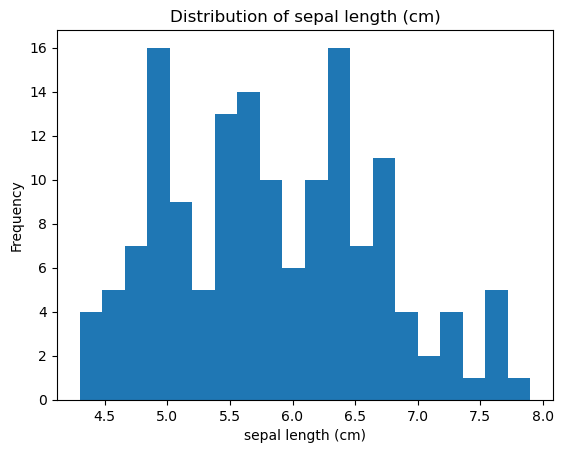

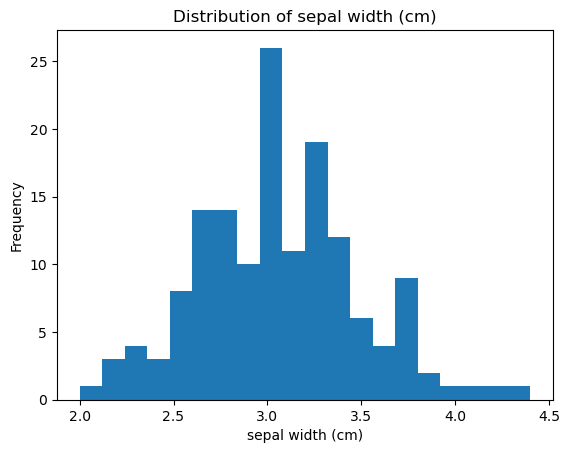

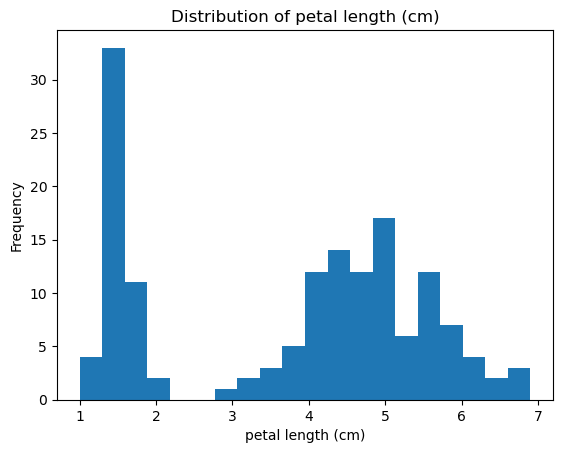

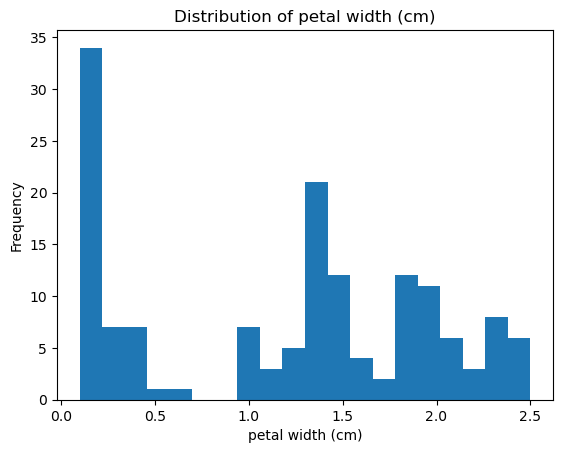

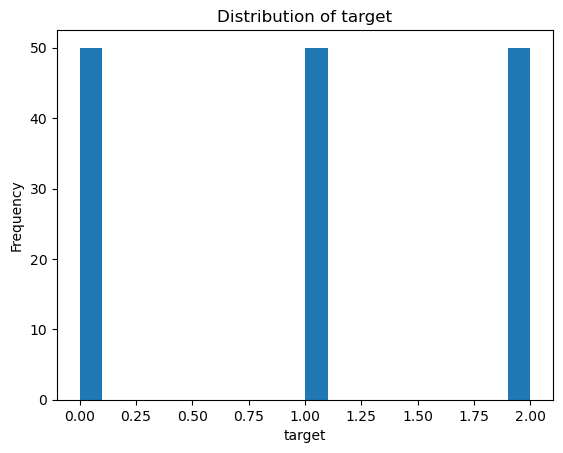

In [45]:
import matplotlib.pyplot as plt

for column in df.columns:
    plt.figure()
    df[column].plot(kind='hist', bins=20)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

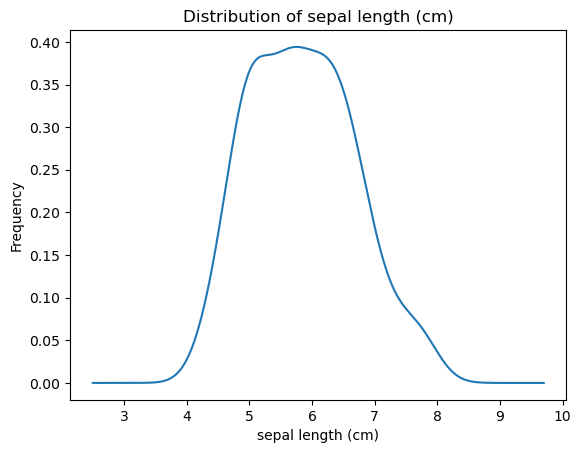

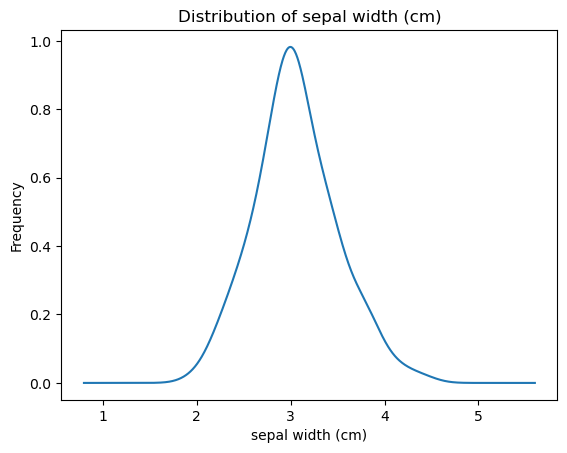

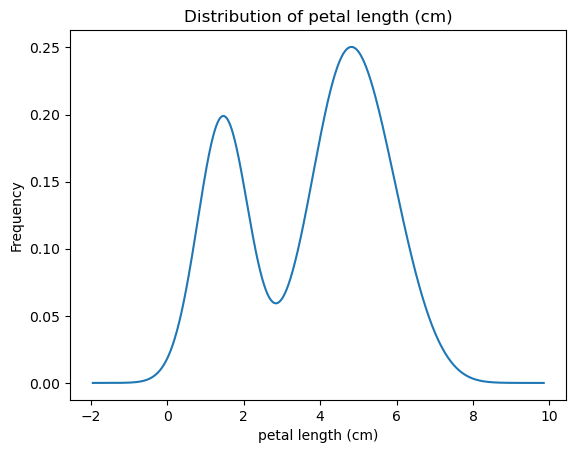

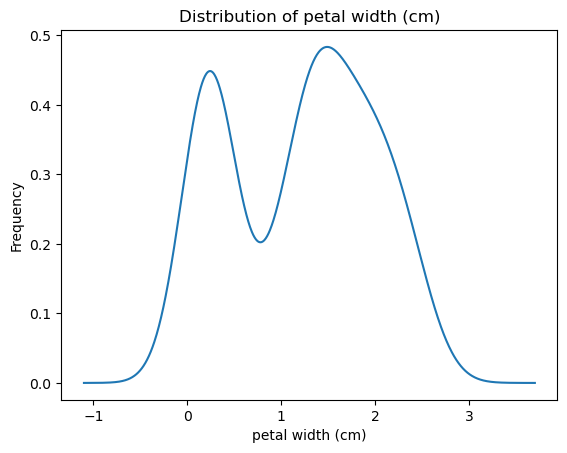

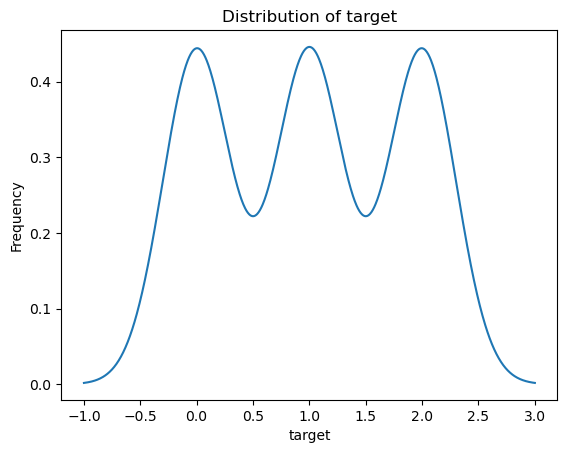

In [46]:
import matplotlib.pyplot as plt

for column in df.columns:
    plt.figure()
    df[column].plot(kind="density")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

Since the Iris dataset contains continuous features, MultinomialNB is not suitable.
We can use GaussianNB which assumes a Gaussian distribution for the features.
Alternatively, we can use BernoulliNB by binarizing the features.

When we're chosen between the multi and the bernouli, we choose the MultinomialNb because it captures a more precise values of the features

BernoulliNB performs poorly on the Iris dataset because it assumes binary features.
Since the Iris dataset contains continuous features, binarizing them may lead to loss of information.

In [48]:
Mnb = MultinomialNB()
cv_scores = cross_val_score(Mnb, iris.data, iris.target, cv=5)
print("Cross Validation Scores (MultinomialNb):", cv_scores)

Cross Validation Scores (MultinomialNb): [1.         0.96666667 0.9        0.9        1.        ]


In [49]:
Gnb = GaussianNB()
cv_scores = cross_val_score(Gnb, iris.data, iris.target, cv=5)
print("Cross Validation Scores (GaussianNB):", cv_scores)

Cross Validation Scores (GaussianNB): [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]


In [50]:
bnb = BernoulliNB()
cv_scores_bnb = cross_val_score(bnb, iris.data, iris.target, cv=5)
print("Cross Validation Scores (BernoulliNB):", cv_scores_bnb)

Cross Validation Scores (BernoulliNB): [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]


In [38]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(iris.data, iris.target)

MultinomialNB()

In [39]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(iris.data, iris.target)

BernoulliNB()

In [40]:
sample = [[5.85, 4.5, 1, 2.5]]
print("Predicted class (MultinomialNB):", mnb.predict(sample))
print("Predicted class (BernoulliNB):", bnb.predict(sample))

Predicted class (MultinomialNB): [1]
Predicted class (BernoulliNB): [0]
